# Week-3. Matplotlibによる描画（１）

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# cwdのパスは環境によって書き換える。
%cd /content/drive/MyDrive/100本ノックチャレンジ/06_Visualization_100_knocks/02_Answers
%ls -lha

/content/drive/MyDrive/100本ノックチャレンジ/06_Visualization_100_knocks/02_Answers
total 1.1M
drwx------ 2 root root 4.0K Sep  7 04:46 data/
-rw------- 1 root root 423K Sep 10 03:04 Week01_answer_colab.ipynb
-rw------- 1 root root 316K Sep 10 03:24 Week02_answer_colab.ipynb
-rw------- 1 root root 205K Sep 10 06:17 Week03_answer_colab.ipynb
-rw------- 1 root root  82K Sep 10 06:21 Week04_answer_colab.ipynb


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# jupyter内に描画

In [4]:
# Irisのデータセット
# CSVファイルの読み込み
df = pd.read_csv("./data/iris.csv") # df = dataframe の略
df.head()

,a1,a2,a3,a4,id,label
0,5.1,3.5,1.4,0.2,id_1,Iris-setosa
1,4.9,3.0,1.4,0.2,id_2,Iris-setosa
2,4.7,3.2,1.3,0.2,id_3,Iris-setosa
3,4.6,3.1,1.5,0.2,id_4,Iris-setosa
4,5.0,3.6,1.4,0.2,id_5,Iris-setosa


In [5]:
# グラフ描画に必要なリストの定義
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
label_list = list(df.label.unique())
print(label_list)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


## Q11. 以下の様なヒストグラムを描きなさい。


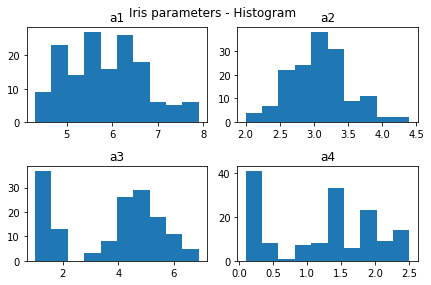

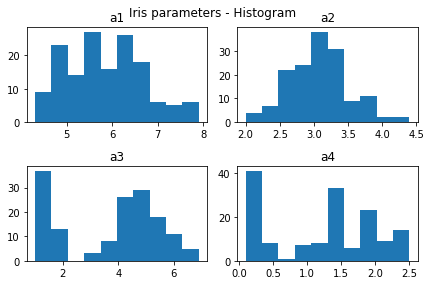

In [6]:
# 図の枠を作成
fig = plt.figure()
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

# タイトル
fig.suptitle("Iris parameters - Histogram")
axes1.set_title("a1")
axes2.set_title("a2")
axes3.set_title("a3")
axes4.set_title("a4")

# ヒストグラムの描画
axes1.hist(df["a1"], bins=10)
axes2.hist(df["a2"], bins=10)
axes3.hist(df["a3"], bins=10)
axes4.hist(df["a4"], bins=10)

# 描画
#fig.show() # タイトルと図が重なってしまう
fig.tight_layout()

## Q12. 以下の様な散布図を描きなさい。

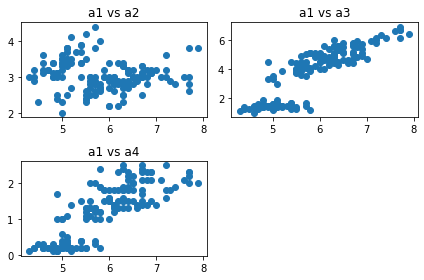

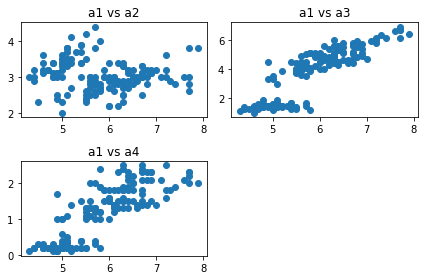

In [7]:
# 図の枠を作成
fig = plt.figure()
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)

# タイトル
#fig.suptitle("Iris parameters - Histogram") #サブタイトルと重なるので非表示にした
axes1.set_title("a1 vs a2")
axes2.set_title("a1 vs a3")
axes3.set_title("a1 vs a4")

# 散布図の描画
axes1.scatter(df["a1"], df["a2"])
axes2.scatter(df["a1"], df["a3"])
axes3.scatter(df["a1"], df["a4"])

# 描画
#fig.show() # タイトルと図が重なってしまう
fig.tight_layout() # それでもタイトルとサブタイトルが重なる（改善方法？）

## Q13. 以下の様にあやめの種類別に色分けして散布図を描きなさい。


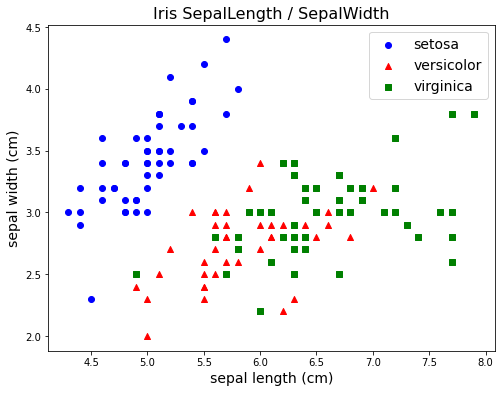

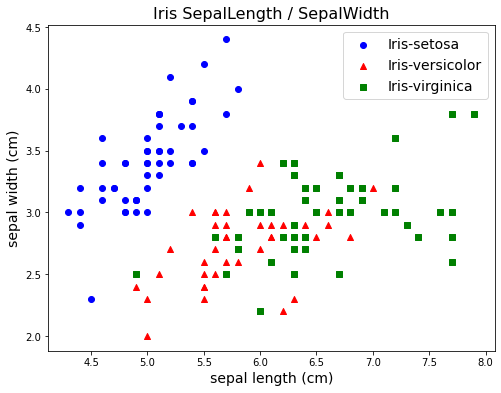

In [8]:
fig1 = plt.figure(figsize=(8, 6))
ax = fig1.add_subplot(111)
markers = ['o', '^', 's']
colors = ['blue', 'red', 'green']
            
for i in range(len(label_list)):
                ax.scatter(
                    x=df.a1[df.label == label_list[i]],
                    y=df.a2[df.label == label_list[i]],
                    label=label_list[i],
                    marker=markers[i],
                    c=colors[i]
                    )

ax.legend(loc='best', fontsize=14)
ax.set_title('Iris SepalLength / SepalWidth', size=16)
ax.set_xlabel(feature_names[0], size=14)
ax.set_ylabel(feature_names[1], size=14)

## Q13. 以下の様にあやめの種類別に色分けして散布図を描きなさい。

fig1.show()

## Q14. 以下の様にあやめの種類別に色分けして三次元の散布図を描きなさい。

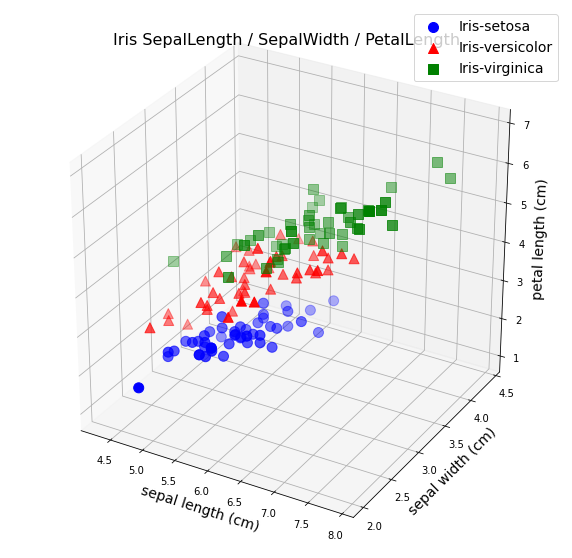

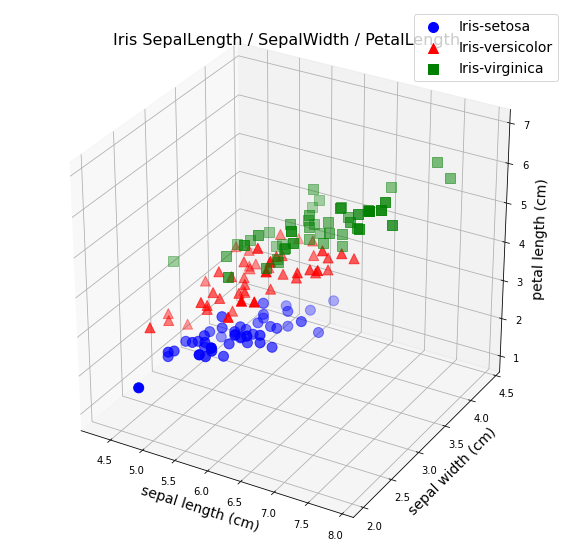

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig2 = plt.figure(figsize=(10, 10))
ax = fig2.add_subplot(111, projection='3d') # ※1 三次元プロットを指定

markers = ['o', '^', 's']
colors = ['blue', 'red', 'green']

for i in range(len(label_list)):
                ax.scatter(
                    # xs=iris.data[iris.target==i, 0], # x軸データ
                    # ys=iris.data[iris.target==i, 1], # y軸データ
                    # zs=iris.data[iris.target==i, 2], # z軸データ
                    xs=df.a1[df.label == label_list[i]],
                    ys=df.a2[df.label == label_list[i]],
                    zs=df.a3[df.label == label_list[i]],
                    label=label_list[i],
                    marker=markers[i],
                    s=100,
                    c=colors[i]
                    )

ax.set_xlabel(feature_names[0], size=14)
ax.set_ylabel(feature_names[1], size=14)
ax.set_zlabel(feature_names[2], size=14)

ax.set_title('Iris SepalLength / SepalWidth / PetalLength', size=16) 
ax.legend(loc='best', fontsize=14)

## Q15. 以下の様にa1～a4のボックスプロットを描きなさい

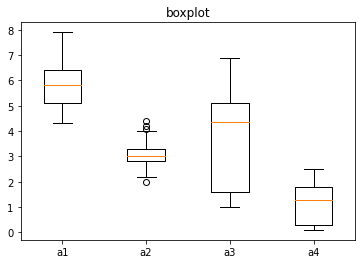

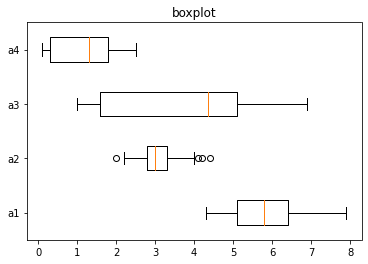

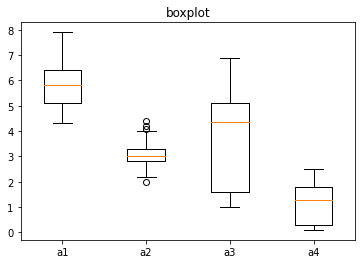

In [10]:
labels = ["a1", "a2", "a3", "a4"]
plt.boxplot([df.a1, df.a2, df.a3, df.a4], labels=labels)
plt.title('boxplot')
plt.show()

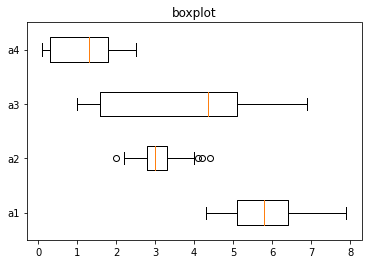

In [11]:
labels = ["a1", "a2", "a3", "a4"]
plt.boxplot([df.a1, df.a2, df.a3, df.a4], labels=labels, vert=False)
plt.title('boxplot')
plt.show()